In [5]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, quad_func, misctools, tools_lens, tools_delens, tools_multitracer
from matplotlib.pyplot import *

In [22]:
snmin, snmax = 1, 10
ntype = 'goal_roll50'
ntype = 'base_roll50'
#ntype = 'base_iso_roll50'
olmax = 1024
#types = [('la','cinv')]
types = ['none']
#klist = ['ALLid']
klist = ['TT','TE','EE','EB']
klist = ['comb']
kfltr = 'none'
#kfltr = 'cinv'
pE = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=ntype)

In [23]:
rho, bb = {}, {}
d = prjlib.data_directory()
for fltr in types:
    p = prjlib.analysis_init(t='la',freq='com',fltr=fltr,snmin=snmin,snmax=snmax,ntype=ntype)
    qobj = tools_lens.init_qobj(p.stag,'False',rlmin=300,rlmax=4096)
    mobj = tools_multitracer.mass_tracer(p,qobj,add_cmb=['TT','TE','EE','EB'])
    dobj = tools_delens.init_template(p.stag+qobj.ltag,mobj.klist,pE.stag,False,klist=klist,kfltr=kfltr,elmin=50)
    Wsa, __ = prjlib.window('sa',512)
    #Wla, __ = prjlib.window('la',ascale=0.)
    #Wsa *= hp.pixelfunc.ud_grade(Wla,512)
    #wnsa = np.mean(Wsa)
    pid = prjlib.analysis_init(t='id',ntype='cv',snmin=snmin,snmax=snmax)

{'TT': 0, 'TE': 1, 'EE': 2, 'EB': 3, 'g0': 4, 'g1': 5, 'g2': 6, 'g3': 7, 'g4': 8, 'g5': 9, 'cib': 10}
SAT mask is further multiplied by hit-count binary


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


OSError: /project/projectdirs/sobs/delensing/delensb/aps/rlz/cl_ALLid_le50-2048_lk20-2048_none_lacom_base_roll50_mv3_a5.0deg_none_l300-4096_TT-TE-EE-EB-g0-g1-g2-g3-g4-g5-cib_cocom_base_roll50_cinv_0001.dat not found.

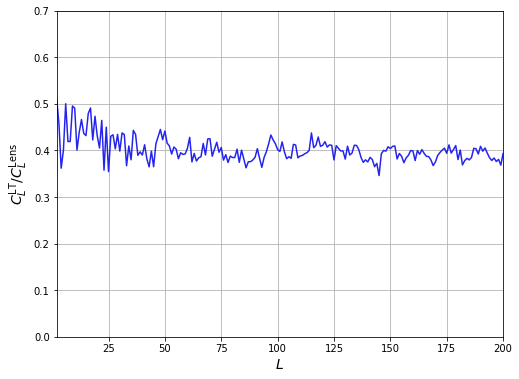

In [24]:
pl.plot_1dstyle(fsize=[8,6],xmin=2,xmax=200,ymin=.0,ymax=.7,grid=True,ylab=r'$C_L^{\rm LT}/C_L^{\rm Lens}$')
for k in klist:
    r = 0.
    for i in range(snmin,snmax+1):
        BB, TT, BT = np.loadtxt(dobj.cl[k][i],unpack=True)
        r += BT**2/BB/TT
    plot(1-r/(snmax-snmin+1))
    #savefig('fig_each_'+fltr+'_'+ntype+'_k'+kfltr+'_'+p.stag+qobj.ltag+'_'+pE.stag+'.png')

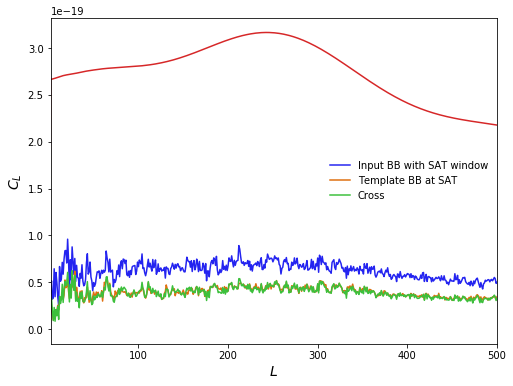

In [21]:
# BB spec
wnsa = 1.
pl.plot_1dstyle(xmin=2,xmax=500)
BB, TT, BT = np.loadtxt(dobj.cl['comb'][1],unpack=True)
plot(BB/wnsa,label='Input BB with SAT window')
plot(TT/wnsa,label='Template BB at SAT')
plot(BT/wnsa,label='Cross')
plot(p.lcl[2])
legend()
#savefig('fig_example.png')

OSError: /project/projectdirs/sobs/delensing/delensb/aps/rho_comb_le50-2048_lk20-2048_none_lacom_base_roll50_mv3_a5.0deg_none_l300-4096_TT-TE-EE-EB-g0-g1-g2-g3-g4-g5-cib_cocom_base_roll50_cinv not found.

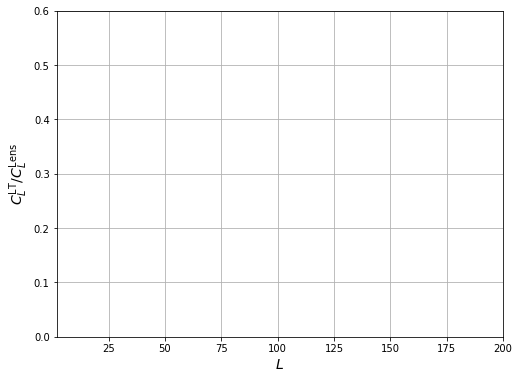

In [12]:
pl.plot_1dstyle(fsize=[8,6],xmin=2,xmax=200,ymin=.0,ymax=.6,grid=True,ylab=r'$C_L^{\rm LT}/C_L^{\rm Lens}$')
for fltr in types:
    bb, rho = np.loadtxt(dobj.frho,unpack=True,usecols=(1,2))
    #plot(rho[fltr]/bb[fltr])
    plot(rho/bb)
    #savefig('fig_wopt_'+fltr+'_'+ntype+'_k'+kfltr+'_'+p.stag+qobj.ltag+'_'+pE.stag+'.png')